In [1]:
using DelimitedFiles 
using PyPlot
using Printf
import FlowFarm; const ff = FlowFarm
using BenchmarkTools

# Round

## 12 directions

### Set Up

In [2]:
# include case information
include("./inputfiles/model_set_9_38turb_12dir_round_farm.jl");

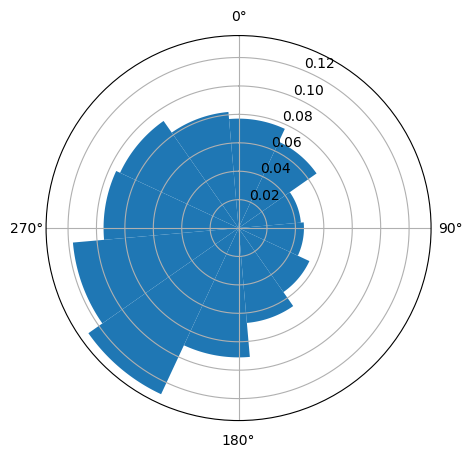

In [3]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windprobabilities
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_round_12dir_probability.pdf")

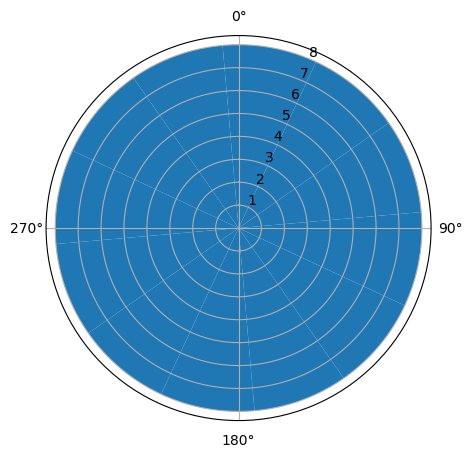

In [4]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windspeeds
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_round_12dir_speeds.pdf")

### Run TIP Model

In [5]:
AEPTIP = ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.1)

4.6109190256485297e11

In [6]:
@benchmark AEPTIP = ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.1)

BenchmarkTools.Trial: 
  memory estimate:  3.49 MiB
  allocs estimate:  15927
  --------------
  minimum time:     4.209 ms (0.00% GC)
  median time:      4.768 ms (0.00% GC)
  mean time:        5.197 ms (1.94% GC)
  maximum time:     20.884 ms (0.00% GC)
  --------------
  samples:          962
  evals/sample:     1

### Run FLOWFarm - Jensen TopHat Model

In [7]:
wakedeficitmodel = ff.JensenTopHat()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJTH = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

5.604029532722445e11

In [8]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  60.52 KiB
  allocs estimate:  213
  --------------
  minimum time:     1.069 ms (0.00% GC)
  median time:      1.106 ms (0.00% GC)
  mean time:        1.238 ms (0.18% GC)
  maximum time:     3.993 ms (57.91% GC)
  --------------
  samples:          4033
  evals/sample:     1

### Run FLOWFarm - Jensen Cosine Model

In [9]:
wakedeficitmodel = ff.JensenCosine()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJC = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

3.136682591180346e11

In [10]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  60.61 KiB
  allocs estimate:  212
  --------------
  minimum time:     1.555 ms (0.00% GC)
  median time:      1.706 ms (0.00% GC)
  mean time:        1.804 ms (0.10% GC)
  maximum time:     9.292 ms (0.00% GC)
  --------------
  samples:          2769
  evals/sample:     1

### Run FLOWFarm - Bastankhah Model

In [11]:
wakedeficitmodel = ff.GaussYaw()
wakedeflectionmodel = ff.GaussYawDeflection()
wakecombinationmodel = ff.LinearLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelMaxTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPB = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

4.6361832503453e11

In [12]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  59.14 KiB
  allocs estimate:  209
  --------------
  minimum time:     2.809 ms (0.00% GC)
  median time:      3.117 ms (0.00% GC)
  mean time:        3.160 ms (0.07% GC)
  maximum time:     8.215 ms (0.00% GC)
  --------------
  samples:          1581
  evals/sample:     1

### Run FLOWFarm MultiZone Model

In [13]:
wakedeficitmodel = ff.Multizone()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPM = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

5.1913417152240265e11

In [14]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  2.76 MiB
  allocs estimate:  25520
  --------------
  minimum time:     3.041 ms (0.00% GC)
  median time:      3.183 ms (0.00% GC)
  mean time:        3.337 ms (3.18% GC)
  maximum time:     10.886 ms (0.00% GC)
  --------------
  samples:          1497
  evals/sample:     1

### Load LES Data

In [15]:
lesdata = readdlm("inputfiles/BaselineSOWFADirectionalPowerOutputGenerator.txt",  '\t', skipstart=0)
dir_power = zeros(12)
for dir = 1:12
    direction = Int64(round(wind_data[dir, 1]*180.0/pi))
    dir_power[dir] = wind_data[dir,3]*sum(lesdata[findall(==(direction), lesdata[:,1]), 5])
end
AEPLES = 365.25*24*sum(dir_power)

4.741662636140631e11

### Compare TIP vs TopHat

In [16]:
ErrorTIPvsTopHat = 100*(AEPTIP-AEPJTH)/AEPJTH
ErrorTIPvsCosine = 100*(AEPTIP-AEPJC)/AEPJC
ErrorTIPvsMultizone = 100*(AEPTIP-AEPM)/AEPM
ErrorTIPvsBastankhah = 100*(AEPTIP-AEPB)/AEPB
ErrorTIPvsLES = 100*(AEPTIP-AEPLES)/AEPLES
println("TIP AEP: ", AEPTIP)
println("Jensen Top Hat AEP:   ", AEPJTH)
println("Jensen Cosine AEP:   ", AEPJC)
println("Multi-Zone AEP:   ", AEPM)
println("Bastankhah AEP:   ", AEPB)
@printf("Error vs Jensen Top Hat:  %.3f%%\n", ErrorTIPvsTopHat)
@printf("Error vs Jensen Cosine:   %.3f%%\n", ErrorTIPvsCosine)
@printf("Error vs Multi-Zone:  %.3f%%\n", ErrorTIPvsMultizone)
@printf("Error vs Bastankhah:   %.3f%%\n", ErrorTIPvsBastankhah)
@printf("Error vs LES:   %.3f%%\n", ErrorTIPvsLES)

TIP AEP: 4.6109190256485297e11
Jensen Top Hat AEP:   5.604029532722445e11
Jensen Cosine AEP:   3.136682591180346e11
Multi-Zone AEP:   5.1913417152240265e11
Bastankhah AEP:   4.6361832503453e11
Error vs Jensen Top Hat:  -17.721%
Error vs Jensen Cosine:   47.000%
Error vs Multi-Zone:  -11.181%
Error vs Bastankhah:   -0.545%
Error vs LES:   -2.757%


## 36 directions

### Set Up

In [17]:
# include case information
include("./inputfiles/model_set_9_38turb_36dir_round_farm.jl");

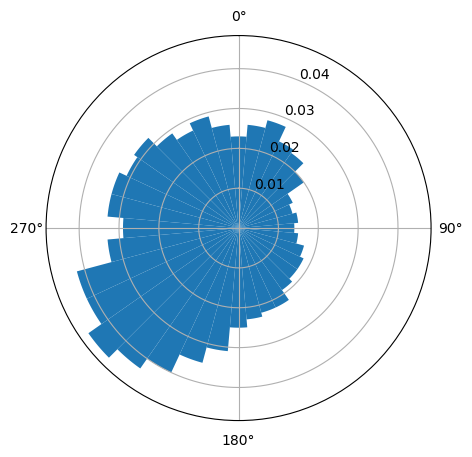

In [18]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windprobabilities
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_round_36dir_probability.pdf")

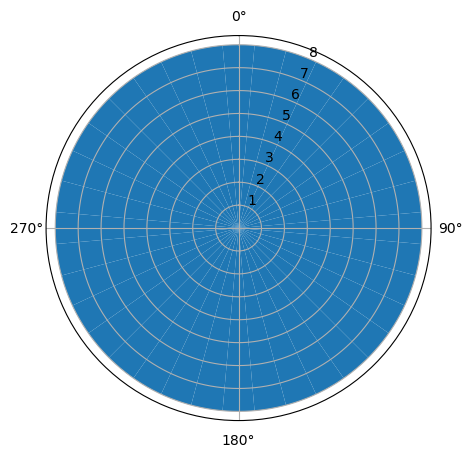

In [19]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windspeeds
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_round_36dir_speeds.pdf")

### Run TIP Model

In [20]:
AEPTIP = ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.1)


4.610919025648531e11

In [21]:
@benchmark ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.1)

BenchmarkTools.Trial: 
  memory estimate:  4.02 MiB
  allocs estimate:  15927
  --------------
  minimum time:     5.013 ms (0.00% GC)
  median time:      5.534 ms (0.00% GC)
  mean time:        5.875 ms (2.04% GC)
  maximum time:     16.872 ms (9.55% GC)
  --------------
  samples:          851
  evals/sample:     1

### Run FLOWFarm - Jensen TopHat Model

In [22]:
wakedeficitmodel = ff.JensenTopHat()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJTH = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

5.602145139207628e11

In [23]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  173.77 KiB
  allocs estimate:  549
  --------------
  minimum time:     3.229 ms (0.00% GC)
  median time:      3.612 ms (0.00% GC)
  mean time:        3.643 ms (0.15% GC)
  maximum time:     7.944 ms (0.00% GC)
  --------------
  samples:          1372
  evals/sample:     1

### Run FLOWFarm - Jensen Cosine Model

In [24]:
wakedeficitmodel = ff.JensenCosine()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJC = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

3.136449272403038e11

In [25]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  173.86 KiB
  allocs estimate:  548
  --------------
  minimum time:     4.826 ms (0.00% GC)
  median time:      5.095 ms (0.00% GC)
  mean time:        5.175 ms (0.09% GC)
  maximum time:     7.826 ms (0.00% GC)
  --------------
  samples:          966
  evals/sample:     1

### Run FLOWFarm - Bastankhah Model

In [26]:
wakedeficitmodel = ff.GaussYaw()
wakedeflectionmodel = ff.GaussYawDeflection()
wakecombinationmodel = ff.LinearLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelMaxTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPB = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

4.4665896613091113e11

In [27]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  172.39 KiB
  allocs estimate:  545
  --------------
  minimum time:     8.849 ms (0.00% GC)
  median time:      9.467 ms (0.00% GC)
  mean time:        10.866 ms (0.03% GC)
  maximum time:     46.400 ms (0.00% GC)
  --------------
  samples:          460
  evals/sample:     1

### Run FLOWFarm MultiZone Model

In [28]:
wakedeficitmodel = ff.Multizone()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPM = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

5.077455057787356e11

In [29]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  8.27 MiB
  allocs estimate:  76418
  --------------
  minimum time:     8.969 ms (0.00% GC)
  median time:      9.736 ms (0.00% GC)
  mean time:        10.877 ms (3.16% GC)
  maximum time:     33.578 ms (0.00% GC)
  --------------
  samples:          460
  evals/sample:     1

### Compare TIP vs TopHat

In [30]:
ErrorTIPvsTopHat = 100*(AEPTIP-AEPJTH)/AEPJTH
ErrorTIPvsCosine = 100*(AEPTIP-AEPJC)/AEPJC
ErrorTIPvsMultizone = 100*(AEPTIP-AEPM)/AEPM
ErrorTIPvsBastankhah = 100*(AEPTIP-AEPB)/AEPB
println("TIP AEP: ", AEPTIP)
println("Jensen Top Hat AEP:   ", AEPJTH)
println("Jensen Cosine AEP:   ", AEPJC)
println("Multi-Zone AEP:   ", AEPM)
println("Bastankhah AEP:   ", AEPB)
@printf("Error vs Jensen Top Hat:  %.2f%%\n", ErrorTIPvsTopHat)
@printf("Error vs Jensen Cosine:   %.2f%%\n", ErrorTIPvsCosine)
@printf("Error vs Multi-Zone:  %.2f%%\n", ErrorTIPvsMultizone)
@printf("Error vs Bastankhah:   %.2f%%\n", ErrorTIPvsBastankhah)

TIP AEP: 4.610919025648531e11
Jensen Top Hat AEP:   5.602145139207628e11
Jensen Cosine AEP:   3.136449272403038e11
Multi-Zone AEP:   5.077455057787356e11
Bastankhah AEP:   4.4665896613091113e11
Error vs Jensen Top Hat:  -17.69%
Error vs Jensen Cosine:   47.01%
Error vs Multi-Zone:  -9.19%
Error vs Bastankhah:   3.23%
